In [136]:
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [1]:
import pandas as pd

df = pd.read_csv('../results/eval.csv', sep='\t')
df

,Recording,Word,Vowel,NN vowel,LG vowel,Proba LG 2,Proba LG 9,Proba LG a,Proba LG e,Proba LG E,...,Proba NN e,Proba NN E,Proba NN i,Proba NN O,Proba NN o,Proba NN u,Proba NN y,Region,Gender,Person ID
0,0,la,a,a,a,0.0000,0.0005,0.9988,0.0000,0.0000,...,0.0000,0.0050,0.0000,0.1000,0.0025,0.0025,0.0000,Bretagne,M,1
1,1,mort,O,o,O,0.0000,0.0101,0.0690,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.5775,0.0225,0.0000,0.0000,Bretagne,M,1
2,2,pu,y,u,y,0.0103,0.0740,0.0007,0.0000,0.0000,...,0.0000,0.0000,0.0125,0.0000,0.0375,0.0250,0.8600,Bretagne,M,1
3,3,loup,u,u,u,0.0001,0.0174,0.0000,0.0000,0.0000,...,0.0025,0.0000,0.0050,0.0025,0.2225,0.5750,0.1775,Bretagne,M,1
4,4,l'air,E,e,E,0.0000,0.0000,0.0000,0.9999,0.0001,...,0.3525,0.3875,0.0000,0.0750,0.0000,0.0000,0.0100,Bretagne,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,5,tôt,o,o,O,0.0000,0.0000,0.0001,0.0000,0.0000,...,0.0025,0.0075,0.0000,0.6525,0.0775,0.0500,0.0000,Ukraine,F,46
896,6,meurt,9,o,O,0.0000,0.0005,0.3806,0.0000,0.0000,...,0.0100,0.0050,0.0000,0.5175,0.0050,0.0025,0.0000,Ukraine,F,46
897,7,se,2,E,a,0.1090,0.2219,0.0145,0.1041,0.3365,...,0.0175,0.0300,0.0000,0.0350,0.0000,0.0000,0.0000,Ukraine,F,46
898,8,mer,E,a,a,0.0000,0.0000,0.9999,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.4200,0.0150,0.0000,0.0000,Ukraine,F,46


In [2]:
df.columns

Index(['Recording', 'Word', 'Vowel', 'NN vowel', 'LG vowel', 'Proba LG 2',
       'Proba LG 9', 'Proba LG a', 'Proba LG e', 'Proba LG E', 'Proba LG i',
       'Proba LG O', 'Proba LG o', 'Proba LG u', 'Proba LG y', 'Proba NN 2',
       'Proba NN 9', 'Proba NN a', 'Proba NN e', 'Proba NN E', 'Proba NN i',
       'Proba NN O', 'Proba NN o', 'Proba NN u', 'Proba NN y', 'Region',
       'Gender', 'Person ID'],
      dtype='object')

In [3]:
df.describe()

,Recording,Proba LG 2,Proba LG 9,Proba LG a,Proba LG e,Proba LG E,Proba LG i,Proba LG O,Proba LG o,Proba LG u,...,Proba NN 9,Proba NN a,Proba NN e,Proba NN E,Proba NN i,Proba NN O,Proba NN o,Proba NN u,Proba NN y,Person ID
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,10.722222,0.064050,0.144448,0.153125,0.075064,0.075022,0.101443,0.068466,0.126511,0.115267,...,0.100411,0.187167,0.101775,0.068822,0.091858,0.118719,0.083508,0.097803,0.085592,21.877778
std,7.647733,0.224472,0.310780,0.338626,0.234224,0.237364,0.286916,0.230426,0.301697,0.292978,...,0.171225,0.297270,0.193621,0.147616,0.203373,0.194217,0.187231,0.192924,0.203291,13.445252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002500,0.000000,0.002500,0.000000,0.000000,0.002500,0.000000,0.002500,0.000000,10.000000
50%,9.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,...,0.026250,0.012500,0.015000,0.007500,0.005000,0.032500,0.005000,0.015000,0.005000,20.500000
75%,16.000000,0.000900,0.028025,0.008725,0.000400,0.000625,0.000200,0.000425,0.008575,0.001825,...,0.100625,0.285000,0.082500,0.042500,0.052500,0.130000,0.042500,0.080625,0.037500,33.000000
max,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.837500,0.997500,0.952500,0.910000,0.970000,0.897500,0.970000,0.932500,0.992500,46.000000


# Gender repartition (vowels, participants)

In [4]:
df.groupby('Gender').count()

,Recording,Word,Vowel,NN vowel,LG vowel,Proba LG 2,Proba LG 9,Proba LG a,Proba LG e,Proba LG E,...,Proba NN a,Proba NN e,Proba NN E,Proba NN i,Proba NN O,Proba NN o,Proba NN u,Proba NN y,Region,Person ID
Gender,,,,,,,,,,,,,,,,,,,,,
F,510,510,510,510,510,510,510,510,510,510,...,510,510,510,510,510,510,510,510,510,510
M,390,390,390,390,390,390,390,390,390,390,...,390,390,390,390,390,390,390,390,390,390


In [5]:
df.groupby(['Person ID']).max().groupby('Gender').count()['Recording']

Gender
F    27
M    19
Name: Recording, dtype: int64

# Size of recordings

Text(0, 0.5, 'Number of people')

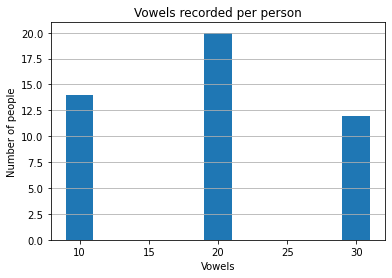

In [257]:
df.groupby('Person ID')['Recording'].max().hist(bins=[9, 11, 19, 21, 29, 31])
plt.grid(axis='x')
plt.title('Vowels recorded per person')
plt.xlabel('Vowels')
plt.ylabel('Number of people')

# Accuracy

In [7]:
df['Correct NN'] = df['Vowel'] == df['NN vowel']
df['Correct LG'] = df['Vowel'] == df['LG vowel']

In [8]:
print(f"NN accuracy: {100*df['Correct NN'].mean():.2f}%")
print(f"LG accuracy: {100*df['Correct LG'].mean():.2f}%")

NN accuracy: 51.56%
LG accuracy: 67.89%


### Per gender

In [9]:
print('NN accuracy')
print(100*df.groupby('Gender')['Correct NN'].mean())
print()

print('LG accuracy')
print(100*df.groupby('Gender')['Correct LG'].mean())
print()

NN accuracy
Gender
F    50.000000
M    53.589744
Name: Correct NN, dtype: float64

LG accuracy
Gender
F    60.392157
M    77.692308
Name: Correct LG, dtype: float64



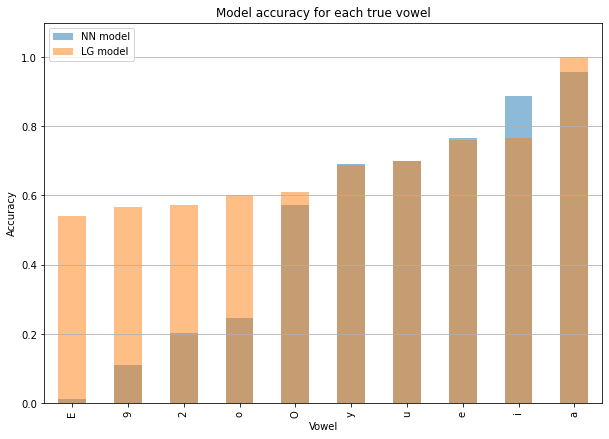

In [261]:
fig = plt.figure(figsize=(10, 7))
df2 = df.groupby('Vowel')['Correct NN'].mean().sort_values()
df2.plot.bar(ylim=[0,1.1], ax=fig.gca(), color='#1f77b4', alpha=0.5, label='NN model')
df3 = df.groupby('Vowel')['Correct LG'].mean().sort_values()
df3.plot.bar(ylim=[0,1.1], ax=fig.gca(), color='#ff7f0e', alpha=0.5, label='LG model')
plt.grid(axis='y')
plt.ylabel('Accuracy')
plt.title('Model accuracy for each true vowel')
plt.legend()
plt.show()

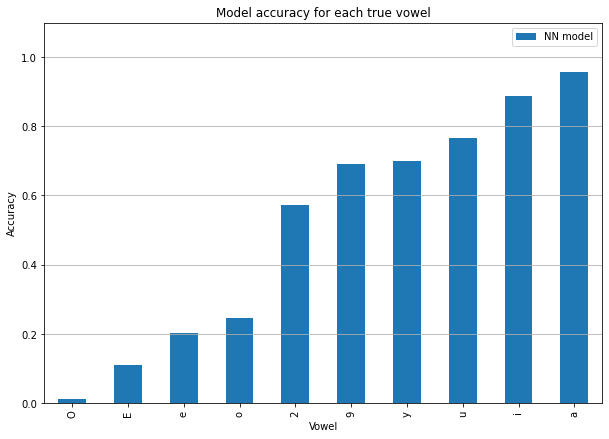

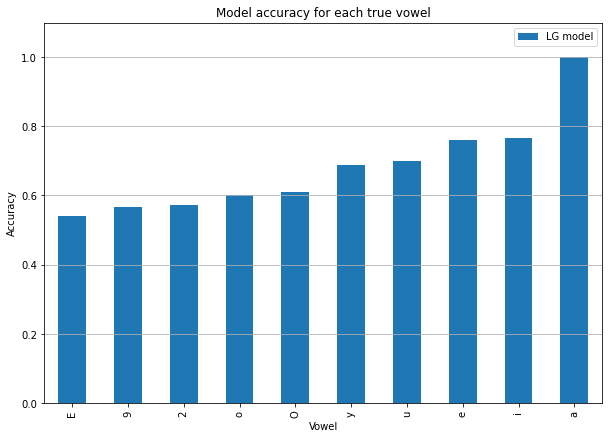

In [266]:
fig = plt.figure(figsize=(10, 7))
df2 = df.groupby('Vowel')['Correct NN'].mean().sort_values()
df2.plot.bar(ylim=[0,1.1], label='NN model', ax=fig.gca())
plt.ylabel('Accuracy')
plt.title('Model accuracy for each true vowel')
plt.grid(axis='y')
plt.legend()
plt.show()
fig = plt.figure(figsize=(10, 7))
df2 = df.groupby('Vowel')['Correct LG'].mean().sort_values()
df2.plot.bar(ylim=[0,1.1], label='LG model', ax=fig.gca())
plt.ylabel('Accuracy')
plt.title('Model accuracy for each true vowel')
plt.grid(axis='y')
plt.legend()
plt.show()

### Per gender

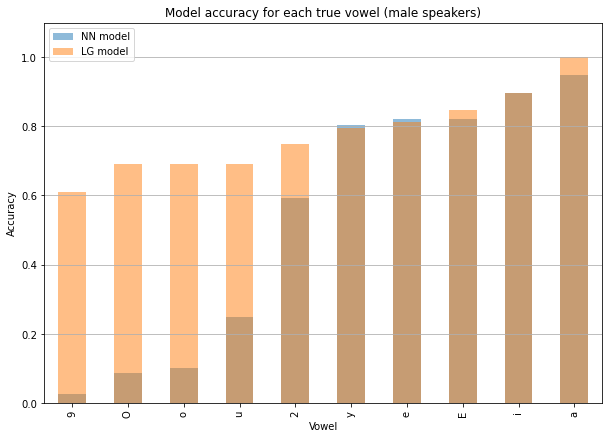

In [269]:
fig = plt.figure(figsize=(10, 7))
df2 = df[df['Gender'] == 'M'].groupby('Vowel')['Correct NN'].mean().sort_values()
df2.plot.bar(ylim=[0,1.1], ax=fig.gca(), color='#1f77b4', alpha=0.5, label='NN model')
df3 = df[df['Gender'] == 'M'].groupby('Vowel')['Correct LG'].mean().sort_values()
df3.plot.bar(ylim=[0,1.1], ax=fig.gca(), color='#ff7f0e', alpha=0.5, label='LG model')
plt.ylabel('Accuracy')
plt.title('Model accuracy for each true vowel (male speakers)')
plt.grid(axis='y')
plt.legend()
plt.show()

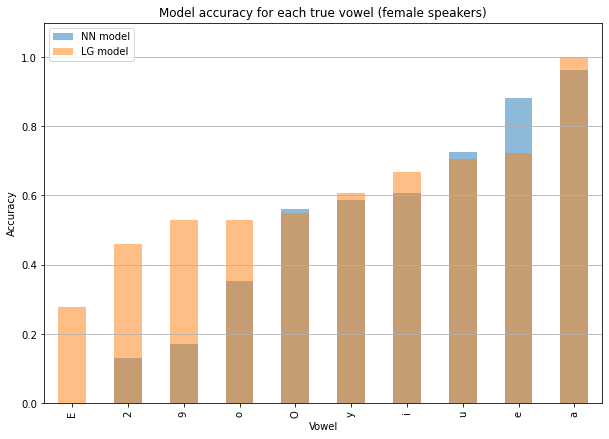

In [271]:
fig = plt.figure(figsize=(10, 7))
df2 = df[df['Gender'] == 'F'].groupby('Vowel')['Correct NN'].mean().sort_values()
df2.plot.bar(ylim=[0,1.1], ax=fig.gca(), color='#1f77b4', alpha=0.5, label='NN model')
df3 = df[df['Gender'] == 'F'].groupby('Vowel')['Correct LG'].mean().sort_values()
df3.plot.bar(ylim=[0,1.1], ax=fig.gca(), color='#ff7f0e', alpha=0.5, label='LG model')
plt.ylabel('Accuracy')
plt.title('Model accuracy for each true vowel (female speakers)')
plt.grid(axis='y')
plt.legend()
plt.show()

# Classification report / Confusion matrix

In [246]:
print('NN model:')
print(classification_report(df['Vowel'], df['NN vowel'], digits=4))
print()
print('LG model:')
print(classification_report(df['Vowel'], df['LG vowel'], digits=4))

NN model:
              precision    recall  f1-score   support

           2     0.8393    0.5732    0.6812        82
           9     0.4926    0.6907    0.5751        97
           E     0.1719    0.1100    0.1341       100
           O     0.0169    0.0111    0.0134        90
           a     0.6617    0.9565    0.7822        92
           e     0.2192    0.2025    0.2105        79
           i     0.8696    0.8889    0.8791        90
           o     0.1964    0.2444    0.2178        90
           u     0.6449    0.7667    0.7005        90
           y     0.9265    0.7000    0.7975        90

    accuracy                         0.5156       900
   macro avg     0.5039    0.5144    0.4992       900
weighted avg     0.5010    0.5156    0.4982       900


LG model:
              precision    recall  f1-score   support

           2     0.8545    0.5732    0.6861        82
           9     0.6044    0.5670    0.5851        97
           E     0.8060    0.5400    0.6467       100
   

Text(0.5, 1.0, 'Linguistic model')

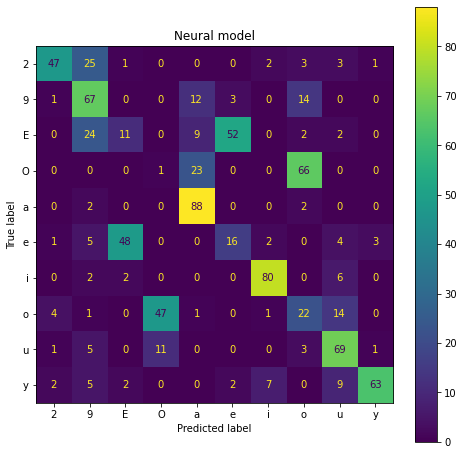

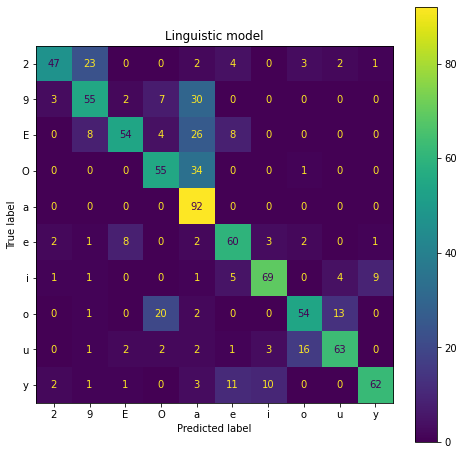

In [278]:
fig = plt.figure(figsize=(8, 8))
classes = list('29EOaeiouy')
cm = confusion_matrix(df['Vowel'], df['NN vowel'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(ax=fig.gca())
plt.title('Neural model')

fig = plt.figure(figsize=(8, 8))
cm = confusion_matrix(df['Vowel'], df['LG vowel'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(ax=fig.gca())
plt.title('Linguistic model')

### Per gender

In [244]:
print('Male')
print('NN model:')
df2 = df[df['Gender'] == 'M']
print(classification_report(df2['Vowel'], df2['NN vowel'], digits=4))
print()
print('LG model:')
print(classification_report(df2['Vowel'], df2['LG vowel'], digits=4))

Male
NN model:
              precision    recall  f1-score   support

           2     0.8261    0.5938    0.6909        32
           9     0.5781    0.8043    0.6727        46
           E     0.1905    0.0870    0.1194        46
           O     0.0370    0.0256    0.0303        39
           a     0.8043    0.9487    0.8706        39
           e     0.1951    0.2500    0.2192        32
           i     0.9211    0.8974    0.9091        39
           o     0.0952    0.1026    0.0988        39
           u     0.6154    0.8205    0.7033        39
           y     0.8889    0.8205    0.8533        39

    accuracy                         0.5359       390
   macro avg     0.5152    0.5350    0.5168       390
weighted avg     0.5106    0.5359    0.5146       390


LG model:
              precision    recall  f1-score   support

           2     0.8276    0.7500    0.7869        32
           9     0.7778    0.6087    0.6829        46
           E     0.8298    0.8478    0.8387        4

In [245]:
print('Female')
print('NN model:')
df2 = df[df['Gender'] == 'F']
print(classification_report(df2['Vowel'], df2['NN vowel'], digits=4))
print()
print('LG model:')
print(classification_report(df2['Vowel'], df2['LG vowel'], digits=4))

Female
NN model:
              precision    recall  f1-score   support

           2     0.8485    0.5600    0.6747        50
           9     0.4167    0.5882    0.4878        51
           E     0.1628    0.1296    0.1443        54
           O     0.0000    0.0000    0.0000        51
           a     0.5862    0.9623    0.7286        53
           e     0.2500    0.1702    0.2025        47
           i     0.8333    0.8824    0.8571        51
           o     0.2571    0.3529    0.2975        51
           u     0.6727    0.7255    0.6981        51
           y     0.9688    0.6078    0.7470        51

    accuracy                         0.5000       510
   macro avg     0.4996    0.4979    0.4838       510
weighted avg     0.4992    0.5000    0.4846       510


LG model:
              precision    recall  f1-score   support

           2     0.8846    0.4600    0.6053        50
           9     0.4909    0.5294    0.5094        51
           E     0.7500    0.2778    0.4054       

Text(0.5, 1.0, 'Linguistic model (male speakers)')

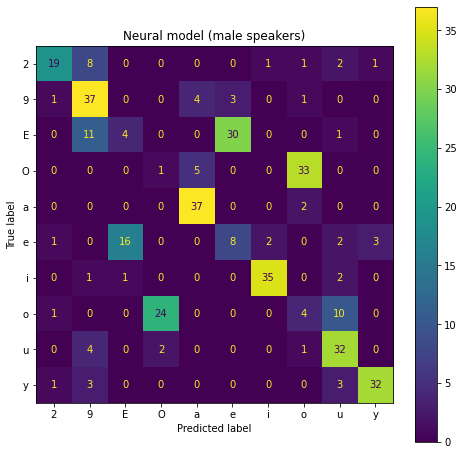

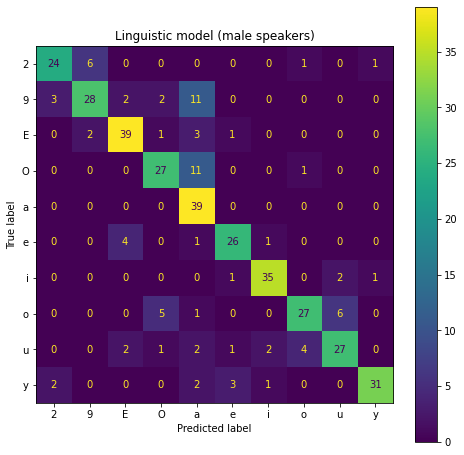

In [279]:
fig = plt.figure(figsize=(8, 8))
df2 = df[df['Gender'] == 'M']
classes = list('29EOaeiouy')
cm = confusion_matrix(df2['Vowel'], df2['NN vowel'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(ax=fig.gca())
plt.title('Neural model (male speakers)')

fig = plt.figure(figsize=(8, 8))
cm = confusion_matrix(df2['Vowel'], df2['LG vowel'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(ax=fig.gca())
plt.title('Linguistic model (male speakers)')

Text(0.5, 1.0, 'Linguistic model (female speakers)')

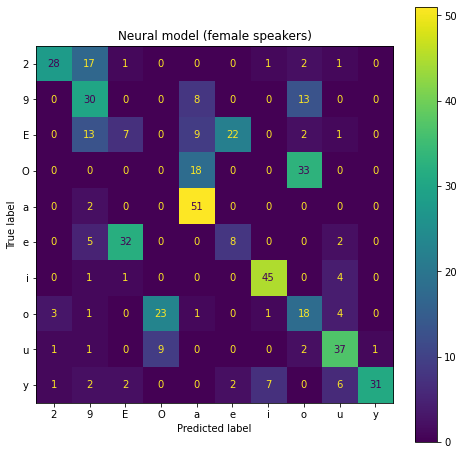

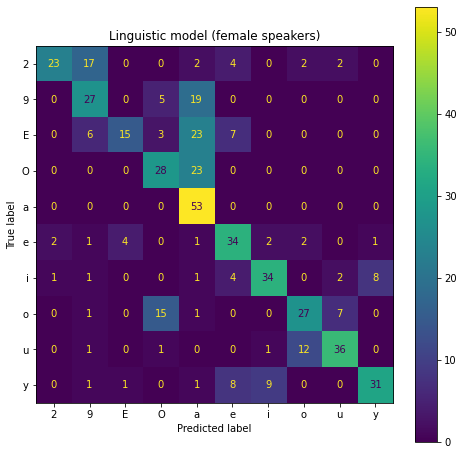

In [280]:
fig = plt.figure(figsize=(8, 8))
df2 = df[df['Gender'] == 'F']
classes = list('29EOaeiouy')
cm = confusion_matrix(df2['Vowel'], df2['NN vowel'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(ax=fig.gca())
plt.title('Neural model (female speakers)')

fig = plt.figure(figsize=(8, 8))
cm = confusion_matrix(df2['Vowel'], df2['LG vowel'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(ax=fig.gca())
plt.title('Linguistic model (female speakers)')

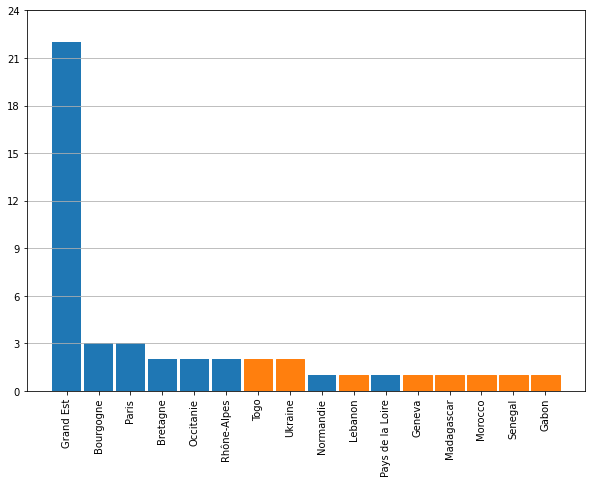

In [281]:
def change_region(row):
    if row['Region'] == 'Belfort':
        row['Region'] = 'Bourgogne'
    elif row['Region'] in ['Champagne-Ardennes', 'Lorraine', 'Picardie-Lorraine']:
        row['Region'] = 'Grand Est'
    elif row['Region'] == 'Toulouse':
        row['Region'] = 'Occitanie'
    elif row['Region'] == 'Lyonnais':
        row['Region'] = 'Rhône-Alpes'
    elif row['Region'] == 'Casablanca':
        row['Region'] = 'Morocco'
    elif row['Region'] == 'Liban':
        row['Region'] = 'Lebanon'
    elif row['Region'] == 'Genève':
        row['Region'] = 'Geneva'
    return row

plt.figure(figsize=(10, 7))
cnt = Counter(df.apply(change_region, axis=1).groupby('Person ID').max()['Region'].values)
labels, values = zip(*cnt.most_common())
indexes = np.arange(len(labels))
barlist = plt.bar(indexes, values, width=.9)
for i, label in enumerate(labels):
    if label in ['Geneva', 'Lebanon', 'Morocco', 'Senegal', 'Gabon', 'Togo', 'Madagascar', 'Ukraine']:
        barlist[i].set_color('#ff7f0e')
plt.xticks(indexes, labels, rotation=90)
plt.yticks(np.arange(0, 25, 3))
plt.grid(axis='y')
plt.show()

# Per person accuracy

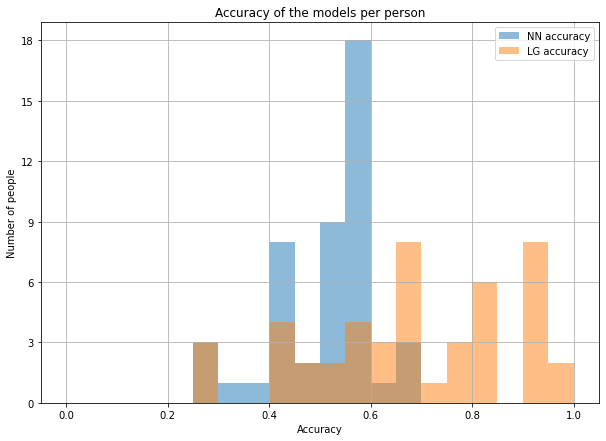

In [294]:
fig = plt.figure(figsize=(10, 7))
df.groupby('Person ID')['Correct NN'].mean().hist(bins=np.arange(0, 1.05, .05), ax=fig.gca(), alpha=.5, label='NN accuracy')
df.groupby('Person ID')['Correct LG'].mean().hist(bins=np.arange(0, 1.05, .05), ax=fig.gca(), alpha=.5, label='LG accuracy')
plt.yticks(np.arange(0, 21, 3))
plt.title('Accuracy of the models per person')
plt.xlabel('Accuracy')
plt.ylabel('Number of people')
plt.legend()